# Задача к лекции "Восстановление кривой доходности"
Взять значения базовых ставок https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/base-rates
и цену процентных свопов https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/swap-rates
Восстановить кривую для Вашей валюты 

In [13]:
def getVariant(email):
    ccy = ['NOK', 'SEK', 'DKK', 'EUR']
    h = hash(email)
    ccy1 = ccy[h % 4]
    print 'Task 1: 5Y curve for ' + ccy1
getVariant('msucourse@list.db.com')

Task 1: 5Y curve for DKK


In [14]:
getVariant('stayaptichek@gmail.com')

Task 1: 5Y curve for SEK


(0, array(0.03033505), array(0.), array(0.), array(0.04060292), array(0.07147957))


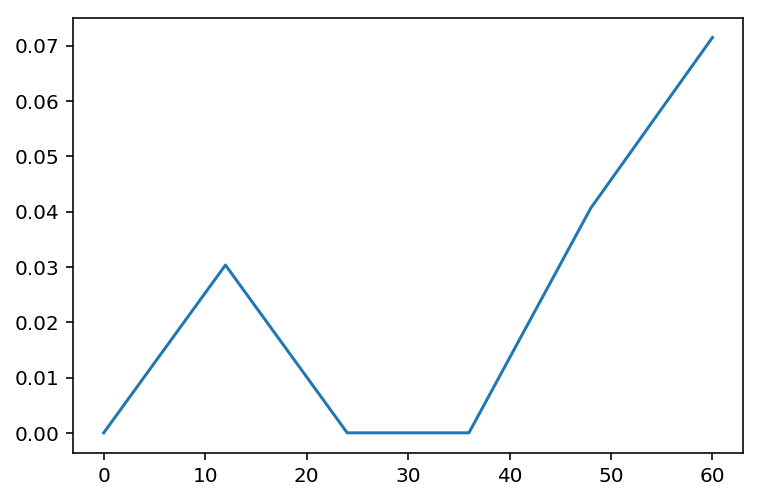

In [16]:
s0 = 0
s1 = 0.03
s2 = 0.00
s3 = 0.00
s4 = 0.04
s5 = 0.07

r0 = s0

import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as pt

# Дискаунт фактор из процентной ставки
# для простоты капитализация процентов не учитывается
def DF(L,m):
    return 1.0 / (1.0 + L*m/12)


def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

def S2(r24, r12, s2):
    r18 = 0.5* (r12 + r24)
    df18 = DF(r18, 6)
    df24 = DF(r24, 12)
    price = 2*(1 - df24) / (df18 + df24)
    return price - s2

def S3(r36, r24, s3):
    r30 = 0.5* (r24 + r36)
    df30 = DF(r30, 6)
    df36 = DF(r36, 12)
    price = 2*(1 - df36) / (df30 + df36)
    return price - s3

def S4(r48, r36, s4):
    r42 = 0.5* (r36 + r48)
    df42 = DF(r42, 6)
    df48 = DF(r48, 12)
    price = 2*(1 - df48) / (df42 + df48)
    return price - s4

def S5(r60, r48, s5):
    r54 = 0.5* (r48 + r60)
    df54 = DF(r54, 6)
    df60 = DF(r60, 12)
    price = 2*(1 - df60) / (df54 + df60)
    return price - s3

r12 = scipy.optimize.broyden1(lambda x: S1(x, s0, s1), 0.0)
r24 = scipy.optimize.broyden1(lambda x: S1(x, r12, s2), 0.0)
r36 = scipy.optimize.broyden1(lambda x: S1(x, r24, s3), 0.0)
r48 = scipy.optimize.broyden1(lambda x: S1(x, r36, s4), 0.0)
r60 = scipy.optimize.broyden1(lambda x: S1(x, r48, s5), 0.0)

print(r0, r12, r24, r36, r48, r60)

pt.plot([0, 12, 24, 36, 48, 60], [r0, r12, r24, r36, r48, r60])
pt.show()

(0, array(0.03033505), array(0.), array(0.), array(0.04060292), array(0.07147957))


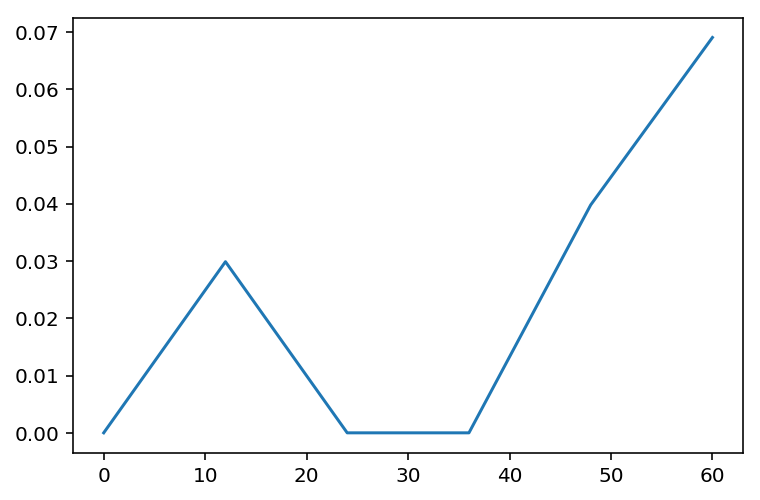

In [17]:
def DF_exp(L,m):
    return np.exp(-L*m/12)


def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF_exp(r6, 6)
    df12 = DF_exp(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

def S2(r24, r12, s2):
    r18 = 0.5* (r12 + r24)
    df18 = DF_exp(r18, 6)
    df24 = DF_exp(r24, 12)
    price = 2*(1 - df24) / (df18 + df24)
    return price - s2

def S3(r36, r24, s3):
    r30 = 0.5* (r24 + r36)
    df30 = DF_exp(r30, 6)
    df36 = DF_exp(r36, 12)
    price = 2*(1 - df36) / (df30 + df36)
    return price - s3

def S4(r48, r36, s4):
    r42 = 0.5* (r36 + r48)
    df42 = DF_exp(r42, 6)
    df48 = DF_exp(r48, 12)
    price = 2*(1 - df48) / (df42 + df48)
    return price - s4

def S5(r60, r48, s5):
    r54 = 0.5* (r48 + r60)
    df54 = DF_exp(r54, 6)
    df60 = DF_exp(r60, 12)
    price = 2*(1 - df60) / (df54 + df60)
    return price - s3

r12_loglin = scipy.optimize.fsolve(lambda x: S1(x, s0, s1), 0.0)
r24_loglin = scipy.optimize.fsolve(lambda x: S1(x, r12, s2), 0.0)
r36_loglin = scipy.optimize.fsolve(lambda x: S1(x, r24, s3), 0.0)
r48_loglin = scipy.optimize.fsolve(lambda x: S1(x, r36, s4), 0.0)
r60_loglin = scipy.optimize.fsolve(lambda x: S1(x, r48, s5), 0.0)

print(r0, r12, r24, r36, r48, r60)

pt.plot([0, 12, 24, 36, 48, 60], [r0, r12_loglin, r24_loglin, r36_loglin, r48_loglin, r60_loglin])
pt.show()

